In [20]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
np.random.seed(0)

In [10]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


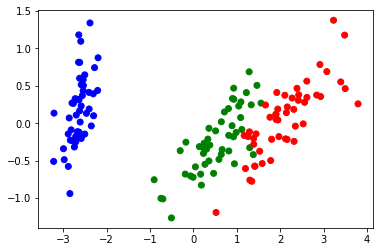

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(df.drop('species', axis=1).values)
colors = np.array(['blue']*50+['green']*50+['red']*50)
plt.scatter(x_pca[:,0], x_pca[:,1], c =  colors)

In [88]:
trainRandom = np.random.rand(len(df))<0.8
train = df[trainRandom]
test = df[~trainRandom]
train.shape, test.shape
# from sklearn.model_selection import train_test_split
# train, test = train_test_split(df,test_size=0.2, stratify = df['species'], random_state = 42)
# train.shape, test.shape

((114, 5), (36, 5))

In [89]:
features = list(df.columns[:4])
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [90]:
df['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [91]:
y = pd.factorize(train['species'])[0]
# y = np.array(train['species'].map({'setosa':0, 'virginica':1, 'versicolor':2})) ### porque en el train, aparecen en ese orden
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

In [92]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [93]:
preds = iris.target_names[clf.predict(test[features])]
preds

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'versicolor',
       'virginica', 'virginica'], dtype='<U10')

In [94]:
test['species']

0          setosa
5          setosa
11         setosa
12         setosa
13         setosa
21         setosa
25         setosa
29         setosa
36         setosa
40         setosa
41         setosa
46         setosa
52     versicolor
58     versicolor
60     versicolor
70     versicolor
74     versicolor
75     versicolor
76     versicolor
85     versicolor
88     versicolor
90     versicolor
95     versicolor
98     versicolor
99     versicolor
104     virginica
110     virginica
112     virginica
115     virginica
121     virginica
123     virginica
125     virginica
131     virginica
133     virginica
147     virginica
149     virginica
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [95]:
pd.crosstab(test['species'],preds, rownames=['Actual Species'], colnames= ['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,12,0,0
versicolor,0,12,1
virginica,0,1,10


In [96]:
list(zip(train[features], clf.feature_importances_))

[('sepal length (cm)', 0.08800708068694282),
 ('sepal width (cm)', 0.027286560132058036),
 ('petal length (cm)', 0.44199363904923805),
 ('petal width (cm)', 0.44271272013176116)]

## Algoritmos supervisados 

In [ ]:
### Naive Bayes
### K-nearset neighbors
### Arbol de Decisiones (Clasificacion, Regresion)
### Random Forest 
### Redes Neuronales